In [1]:
import shift_detector
from shift_detector.detector import Detector
from shift_detector.checks.simple_check import SimpleCheck
from shift_detector.checks.distinction_check import DistinctionCheck
from shift_detector.checks.sorensen_dice_check import SorensenDiceCheck
from shift_detector.checks.conditional_probabilities_check import ConditionalProbabilitiesCheck
from shift_detector.checks.embedding_distance_check import EmbeddingDistanceCheck
from shift_detector.checks.word_prediction_check import WordPredictionCheck
from shift_detector.checks.statistical_checks.numerical_statistical_check import NumericalStatisticalCheck
from shift_detector.checks.statistical_checks.categorical_statistical_check import CategoricalStatisticalCheck
from shift_detector.checks.statistical_checks.text_metadata_statistical_check import TextMetadataStatisticalCheck

2019-06-18 09:54:43,838 [INFO]  'pattern' package not found; tag filters are not available for English
Using TensorFlow backend.


In [2]:
import pandas as pd
'''
df1 = './../train_ascii.csv'
df1 = pd.read_csv(df1, delimiter=';').sample(100)
df2 = './../audits_ascii.csv'
df2 = pd.read_csv(df2, delimiter=';')
'''
sales1 = {'brand': ["Jones LLC", "Alpha Co", "Blue Inc", "Blue Inc", "Alpha Co",
                   "Jones LLC", "Alpha Co", "Blue Inc", "Blue Inc", "Alpha Co",
                   "Jones LLC"] * 10,
         'payment': [150., 200., 50., 10., 5., 150., 200., 50., 10., 5., 1.] * 10,
         'payment2': [15., 2., 5., 0., 5., 3., 200., 50., 10., 5., 1.] * 10,
         'description': ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K"] * 10}

sales2 = {'brand': ["Blue Inc", "Alpha Co",
                   "Jones LLC", "Alpha Co", "Blue Inc", "Blue Inc", "Alpha Co",
                   "Jones LLC"] * 10,
         'payment': [10, 5, 150, 200, 50, 10, 5, 1] * 10,
         'payment2': [15, 2, 5, 0, 5, 3, 200, 50] * 10,
         'description': ["D", "E", "F", "G", "H", "I", "J", "K"] * 10}

df1 = pd.DataFrame.from_dict(sales1)
df2 = pd.DataFrame.from_dict(sales2)

detector = Detector(df1, df2)

Numerical columns: payment2, payment
Categorical columns: brand
Text columns: description
Used columns: brand, payment, payment2, description


In [3]:
sc = SimpleCheck()
dc = DistinctionCheck(num_epochs=10, relative_threshold=0.2)
cp = ConditionalProbabilitiesCheck(min_support=0.01, min_confidence=0.01, rule_limit=10,
                                               min_delta_supports=0.01, min_delta_confidences=0.01)
sdc = SorensenDiceCheck(n=1)
edc = EmbeddingDistanceCheck()
# wpc = WordPredictionCheck(lstm_window=1)
nsc = NumericalStatisticalCheck()
csc = CategoricalStatisticalCheck()
tmc = TextMetadataStatisticalCheck()

In [4]:
import logging

detector.run(sc, dc, cp, sdc, edc, nsc, csc, tmc)

Executing SimpleCheck
    - Executing SimplePrecalculation
Executing DistinctionCheck
    - Executing DistinctionPrecalculation
Executing ConditionalProbabilitiesCheck
    - Executing ConditionalProbabilitiesPrecalculation
    - Executing BinningPrecalculation
Executing SorensenDiceCheck
    - Executing SorensenDicePrecalculations
    - Executing NGram
Executing EmbeddingDistanceCheck
    - Executing EmbeddingDistancePrecalculation
    - Executing TextEmbeddingPrecalculation
    - Executing TokenizeIntoLowerWordsPrecalculation
Executing NumericalStatisticalCheck
Executing CategoricalStatisticalCheck
    - Executing LowCardinalityPrecalculation
Executing TextMetadataStatisticalCheck
    - Executing TextMetadata
    - Executing NumWordsMetadata
    - Use already executed TokenizeIntoLowerWordsPrecalculation
    - Executing NumCharsMetadata
    - Executing DistinctWordsRatioMetadata
    - Use already executed TokenizeIntoLowerWordsPrecalculation


# OVERVIEW

Executed 8 checks


,Column,# Checks Failed,# Checks Executed
0,payment2,1,5
1,payment,1,5
2,brand,0,4
3,description,0,4


# DETAILS

## Simple Check

Examined Columns: ['payment2', 'payment', 'brand']
Shifted Columns: ['payment2', 'payment']

Column 'payment':
Metric: mean with Diff: -0.29 %
Metric: median with Diff: -0.8 %
Metric: quartile_3 with Diff: -0.5 %
Metric: completeness with Diff: -0.27 %

Column 'payment2':
Metric: mean with Diff: +0.3 %
Metric: quartile_1 with Diff: +0.38 %
Metric: quartile_3 with Diff: +0.58 %
Metric: num_distinct with Diff: -0.22 %
Metric: completeness with Diff: -0.27 %
Metric: std with Diff: +0.14 %




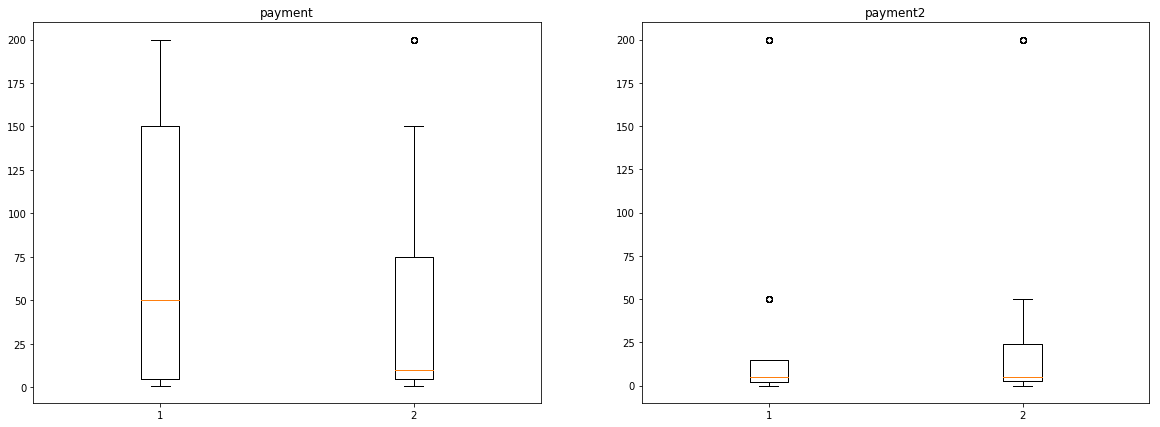

/usr/local/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


## Distinction Check

Examined Columns: ['brand', 'payment', 'payment2', 'description']
Shifted Columns: []

Column 'brand':
0.5625 -> 0.5859375
Column 'payment':
0.5625 -> 0.5359375
Column 'payment2':
0.5625 -> 0.6203125
Column 'description':
0.5625 -> 0.525
'Classification Report':
              precision    recall  f1-score   support

           A       0.58      0.44      0.50        16
           B       0.55      0.69      0.61        16

   micro avg       0.56      0.56      0.56        32
   macro avg       0.57      0.56      0.56        32
weighted avg       0.57      0.56      0.56        32

'F1 score df1':
0.5
'F1 score df2':
0.6111111111111112



## Conditional Probabilities

Examined Columns: ['brand', 'payment2', 'payment']
Shifted Columns: [('brand', 'payment2'), ('payment', 'payment2')]

[payment2: 5.0, payment: 5.0]
payment: 5.0, payment2: 5.0 => () [SLS: (18%, 0%), S: (18%, 0%), C: (100%, 0%)]
delta_support: 18%, number of sub-rules: 7

[payment: 1.0, payment2: 50.0]
payment: 1.0 => payment2: 50.0 [SLS: (9%, 12%), S: (0%, 12%), C: (0%, 100%)]
delta_support: 12%, number of sub-rules: 9

[payment2: 15.0, payment: 10.0]
payment: 10.0, payment2: 15.0 => () [SLS: (0%, 12%), S: (0%, 12%), C: (0%, 100%)]
delta_support: 12%, number of sub-rules: 9

[payment: 150.0, payment2: 5.0]
payment: 150.0 => payment2: 5.0 [SLS: (18%, 12%), S: (0%, 12%), C: (0%, 100%)]
delta_support: 12%, number of sub-rules: 7

[payment2: 2.0, payment: 5.0]
payment: 5.0 => payment2: 2.0 [SLS: (18%, 25%), S: (0%, 12%), C: (0%, 50%)]
delta_support: 12%, number of sub-rules: 9

[payment: 10.0, payment2: 3.0]
payment: 10.0 => payment2: 3.0 [SLS: (18%, 25%), S: (0%, 12%), C: (0%, 50%)]
delta

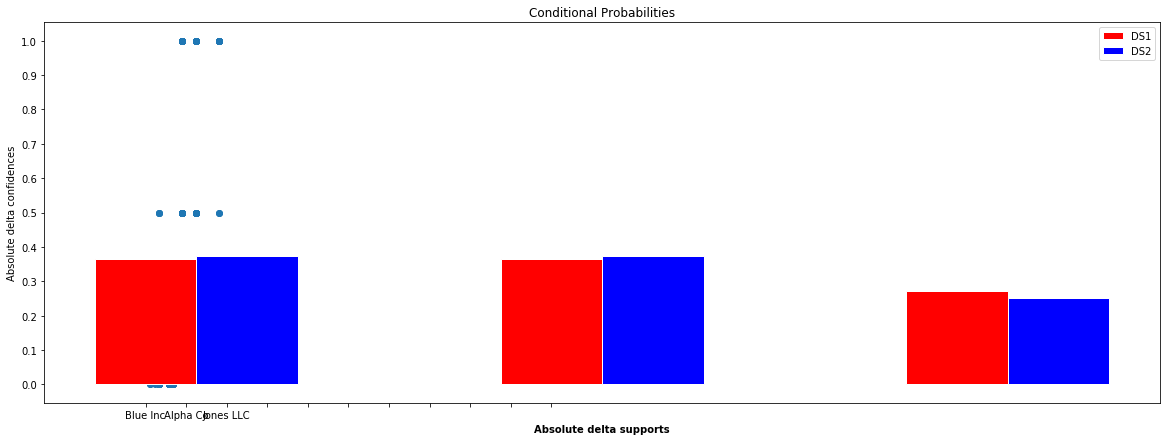

## Sorensen Dice Check

Examined Columns: ['description']
Shifted Columns: []

Column 'description':
	Baseline in Dataset1: 0.32692307692307687
	Baseline in Dataset2: 0.3421052631578947
	Sorensen Dice Coefficient between Datasets: 0.7272727272727274



## Embedding Distance Check

Examined Columns: ['description']
Shifted Columns: []

Column 'description':
	Baseline in Dataset1: 0.014367281410354371
	Baseline in Dataset2: 0.010505547055179965
	Distance between Datasets: 0.005387029431851528



## Statistical Check

Examined Columns: ['payment2', 'payment']
Shifted Columns: []

'test_results':
        payment2   payment
pvalue  0.694614  0.121573



## Statistical Check

Examined Columns: ['brand', 'payment2', 'payment']
Shifted Columns: []

'test_results':
           brand  payment2   payment
pvalue  0.945562  0.029125  0.408371



## Text Metadata Check

Examined Columns: ['description']
Shifted Columns: []

'test_results':
column      description                    
metadata distinct_words num_chars num_words
pvalue              1.0       1.0       1.0



In [5]:
detector.evaluate()

In [6]:
# from IPython.display import Markdown, display
# def printmd(string):
#     display(Markdown(string))

# printmd("**bold text**")
# printmd("<span style='color:red'>Red text</span>")


In [7]:
import sys
print('ipykernel' in sys.modules)

True
